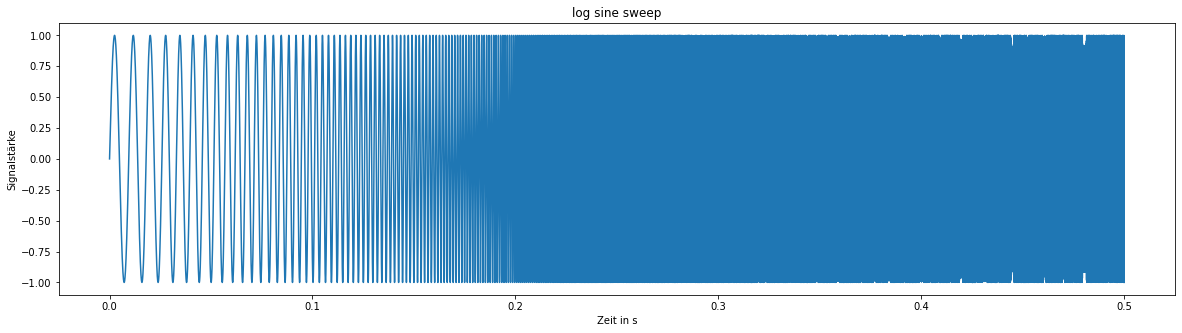

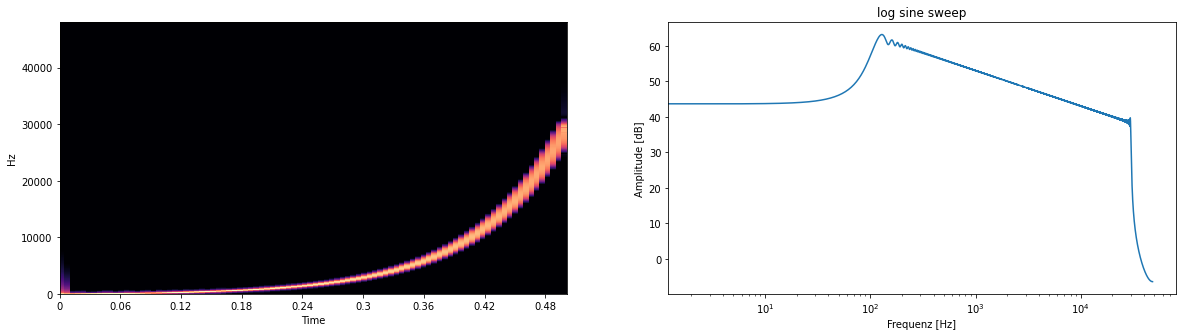

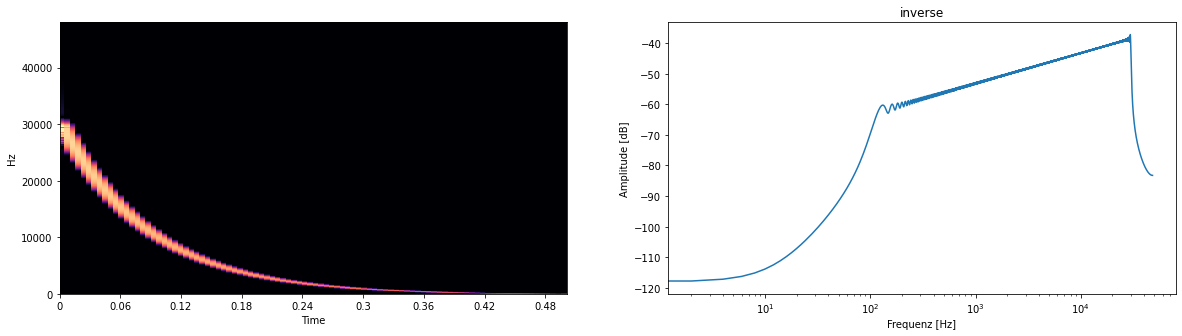

In [1]:
from signal_generator import signal_generator,audio_interface 
sg=signal_generator(sr=96000)
#linsweep=sg.linsweep(w1=10,w2=500,T=10)
logsweep=sg.logsweep(w1=100,w2=30000,T=0.5)


#sine=sg.sine(w=1000, T=10)

#linsweep.plot_signal()
#linsweep.plot_spec()
#linsweep.plot_spectrum()
#linsweep.plot_spectrogram()

logsweep.plot_signal()
logsweep.plot_spec()
sg.plot_spec(logsweep.inverse(),title="inverse")
#logsweep.plot_spectrum()
#logsweep.plot_spectrogram()
#sine.plot_spec()

In [2]:
rec=audio_interface().playrecord(signal=logsweep.signal)

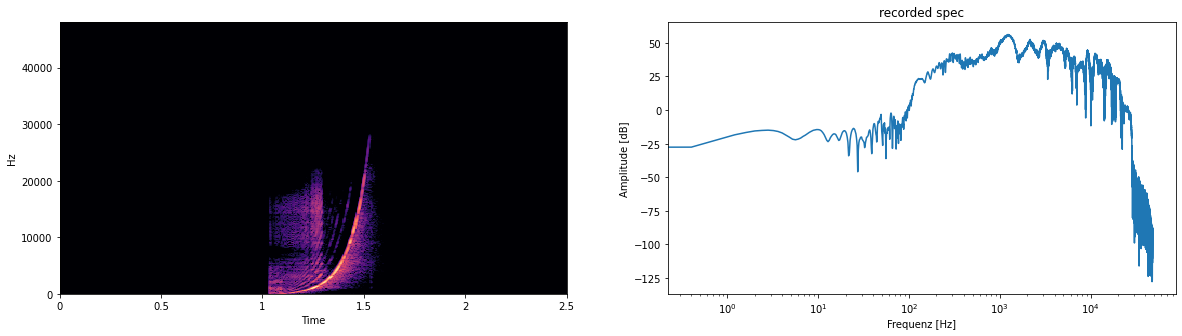

In [3]:
sg.plot_spec(rec,title="recorded spec")

In [5]:
import scipy.fftpack
import scipy.signal
from scipy.fftpack import fft, ifft
from scipy.signal import fftconvolve, convolve, kaiser
import numpy as np

In [8]:
rec=audio_interface().playrecord(signal=logsweep.signal)

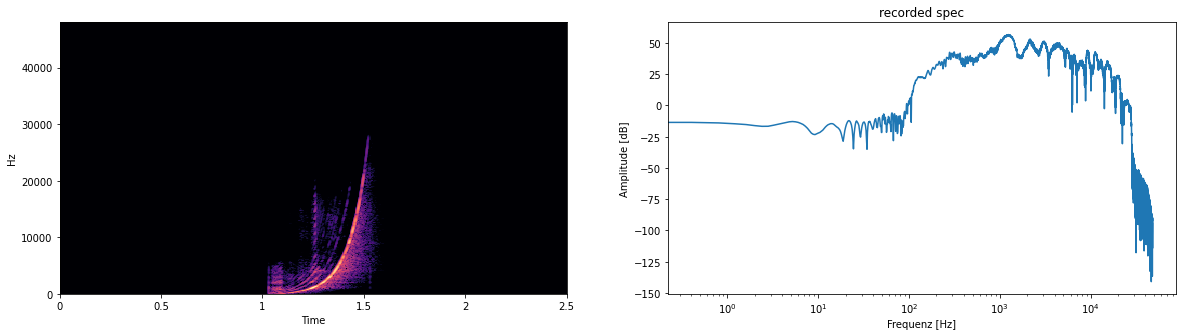

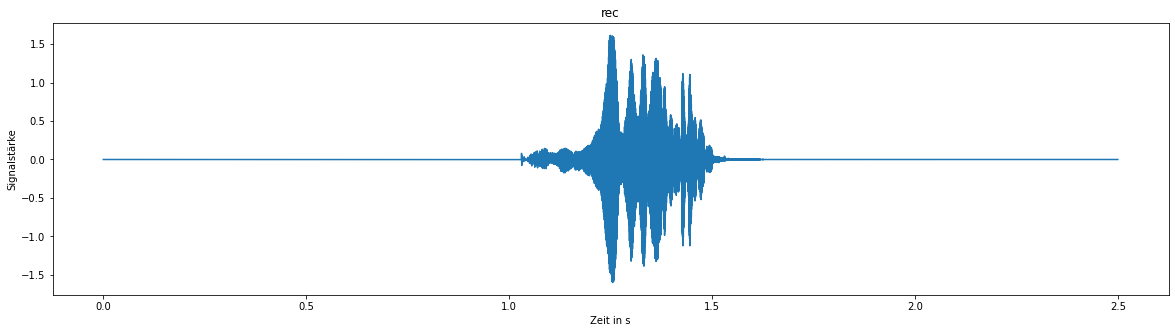

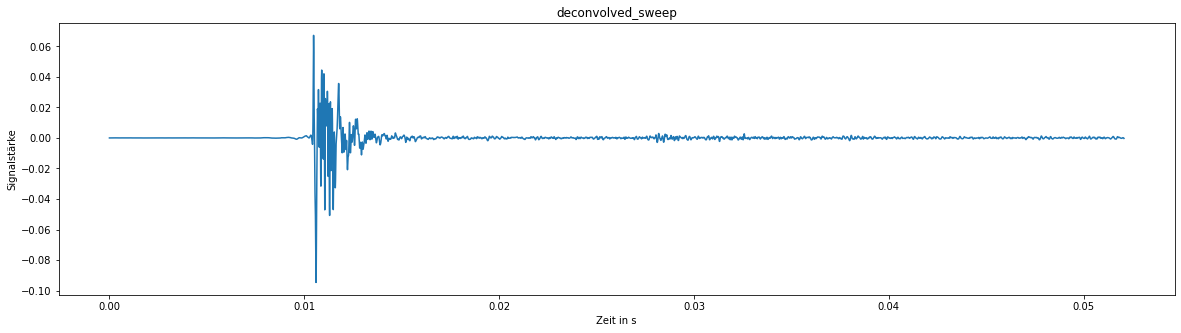

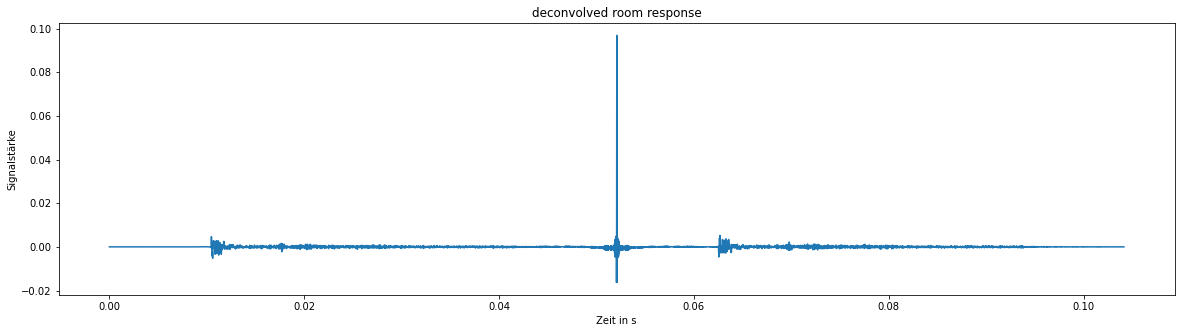

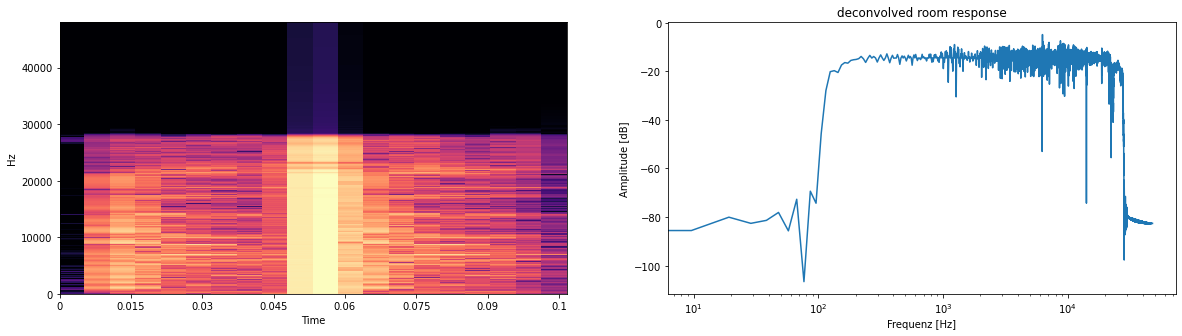

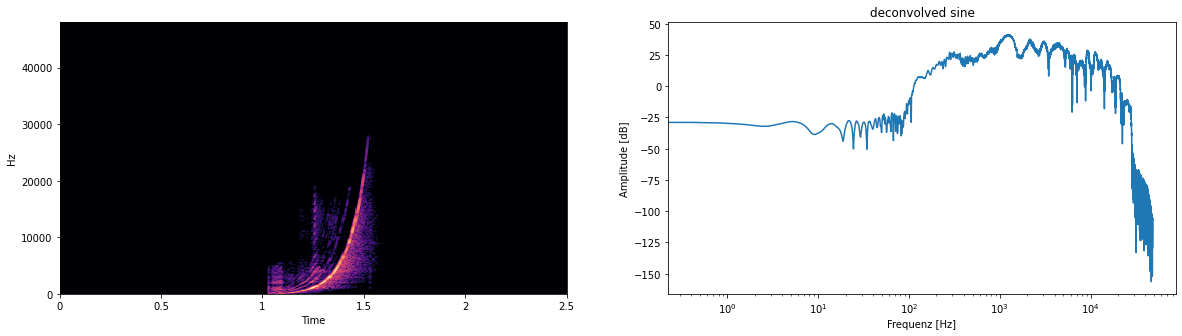

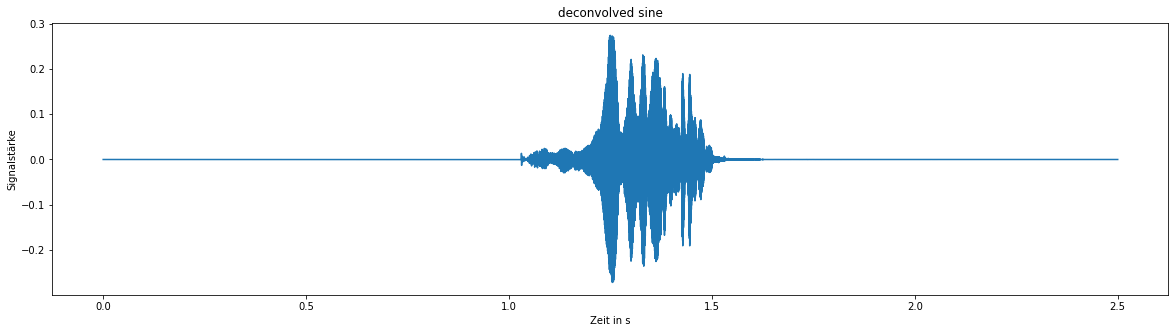

In [19]:
sg.plot_spec(rec,title="recorded spec")
sg.plot_signal(rec,title="rec")

room_response = fftconvolve( rec, logsweep.inverse(), mode='full')
room_response=room_response[int(96000*1.52):int(96000*1.52)+5000]
sg.plot_signal(room_response,title="deconvolved_sweep")

# Derive inverted room response for active room correction.
Hi = fft(room_response)
lmbd = 1e-2
# Perform Weiner deconvolution.
inv_room_response = np.real(ifft(np.conj(Hi)/(Hi*np.conj(Hi) + lmbd**2)))
inv_room_response /= np.max(np.abs(inv_room_response))

deconvolved_ir = fftconvolve(room_response, inv_room_response)

sg.plot_signal(deconvolved_ir,title="deconvolved room response")
sg.plot_spec(deconvolved_ir,title="deconvolved room response")

deconvolved_sweep = fftconvolve(rec, inv_room_response[::48000])
sg.plot_spec(deconvolved_sweep,title="deconvolved sine")
sg.plot_signal(deconvolved_sweep,title="deconvolved sine")